# K-Means Clustering

## Introduction:
## Mathematical Formulation:
## Algorithm:
## Implementation Notes:

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### Defining The K-Means Clustering Model:

In [15]:
class KMeans:
    
    def __init__(self, data, num_centroids):
        
        self.data = data
        self.data_cluster_indices = np.zeros(data.shape[0])
        self.K = num_centroids
        centroid_ix = np.random.choice(np.arange(data.shape[0]), size=self.K, replace=False)
        self.centroids = data[centroid_ix, :]
        
    def fit(self, iterations=100, plot=False):
        it = 0
        while it < iterations:
            prev_centroids = self.centroids
            self.get_closest_centroids()
            self.assign_new_centroids()
            it += 1
            if plot:
                self.plot()
                
    def centroids(self):
        return self.centroids
    
    def plot(self):
        if self.data.shape[1] != 2:
            print("Cannot plot data of dimension other than 2")
            return
        
        for i in range(self.K):
            x = self.data[self.data_cluster_indices==i,:]
            plt.plot(x[:,0],x[:,1],'.')
            plt.plot(self.centroids[i,0],self.centroids[i,1],'o',markersize=10)
            
        plt.show()
        
    def assign_new_centroids(self):
        for i in range(self.K):
            data_c_ix = self.data_cluster_indices == i
            self.centroids[i,:] = np.mean(self.data[data_c_ix,:],axis=0)
    
    def get_closest_centroids(self):
        for i in range(self.data_cluster_indices.shape[0]):
            distances = np.sum((self.data[i,:]-self.centroids)**2,axis=1)
            self.data_cluster_indices[i] = np.argmin(distances)

#### Synthetic Data Generation and Fitting the K-Means Model to the Data:

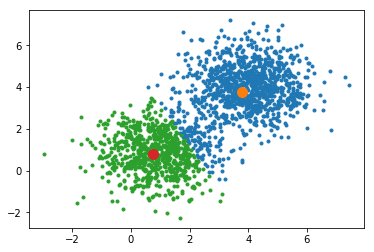

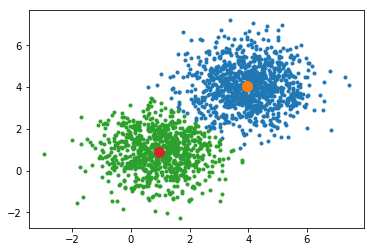

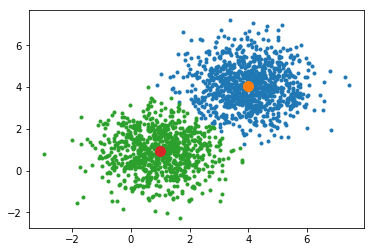

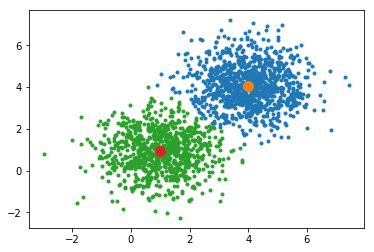

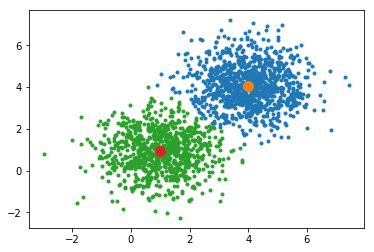

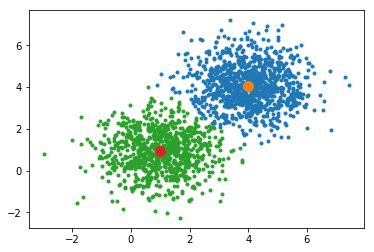

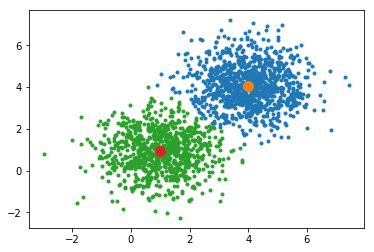

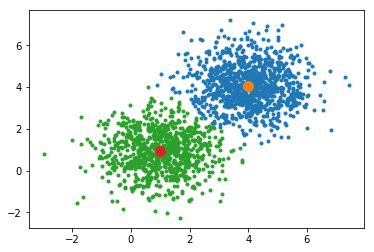

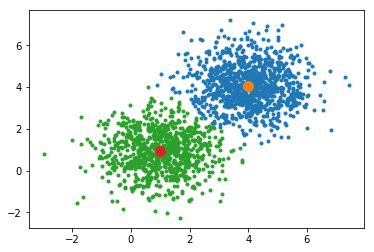

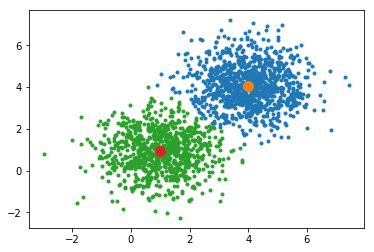

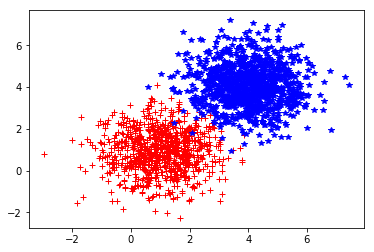

In [16]:
x1 = np.random.normal(loc=1, size=(900,2))
x2 = np.random.normal(loc=4,size=(1000,2))

data = np.concatenate((x1,x2),axis=0)

kmeans =  KMeans(data, 2)
kmeans.fit(iterations=10, plot=True)

# Plotting Original Data
plt.plot(x1[:,0],x1[:,1],'r+')
plt.plot(x2[:,0],x2[:,1],'b*')
plt.show()